### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil
import numpy as np
# Local imports
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import analysis_functions 

# Apply better style
analysis_functions.apply_heatmap_style()



### Run with crabs

In [2]:
# Define study
STUDY_NAME = "opt_collapse_1100_1500_scan_b2"
COLLIDER = "base_collider"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0004/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False

In [3]:
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
#df = df.reset_index(level=1)
#df = df[df["name base collider"] == COLLIDER]

df

normalized amplitude in xy-plane  \
beam  qx     qy     i_oct_b1 i_oct_b2                                     
lhcb2 62.310 60.315 450.0    450.0                                6.062   
      62.311 60.316 450.0    450.0                                6.219   
      62.312 60.317 450.0    450.0                                7.250   
      62.313 60.318 450.0    450.0                                7.844   
      62.314 60.319 450.0    450.0                                7.125   
      62.315 60.320 450.0    450.0                                6.594   
      62.316 60.321 450.0    450.0                                7.188   
      62.317 60.322 450.0    450.0                                7.062   
      62.318 60.323 450.0    450.0                                6.312   
      62.319 60.324 450.0    450.0                                5.281   

                                           qx      qy  i_bunch_b1  i_bunch_b2  \
beam  qx     qy     i_oct_b1 i_oct_b2                                           
lhcb2 62.310 60.315 450.0    450.0     62.310  60.315        89.0        86.0   
      62.311 60.316 450.0    450.0     62.311  60.316        89.0        86.0   
      62.312 60.317 450.0    450.0     62.312  60.317        89.0        86.0   
      62.313 60.318 450.0    450.0     62.313  60.318        89.0        86.0   
      62.314 60.319 450.0    450.0     62.314  60.319        89.0        86.0   
      62.315 60.320 450.0    450.0     62.315  60.320        89.0        86.0   
      62.316 60.321 450.0    450.0     62.316  60.321        89.0        86.0   
      62.317 60.322 450.0    450.0     62.317  60.322        89.0        86.0   
      62.318 60.323 450.0    450.0     62.318  60.323        89.0        86.0   
      62.319 60.324 450.0    450.0     62.319  60.324        89.0        86.0   

                                       num_particles_per_bunch  i_oct_b1  \
beam  qx     qy     i_oct_b1 i_oct_b2                                      
lhcb2 62.310 60.315 450.0    450.0                1.400000e+11     450.0   
      62.311 60.316 450.0    450.0                1.400000e+11     450.0   
      62.312 60.317 450.0    450.0                1.400000e+11     450.0   
      62.313 60.318 450.0    450.0                1.400000e+11     450.0   
      62.314 60.319 450.0    450.0                1.400000e+11     450.0   
      62.315 60.320 450.0    450.0                1.400000e+11     450.0   
      62.316 60.321 450.0    450.0                1.400000e+11     450.0   
      62.317 60.322 450.0    450.0                1.400000e+11     450.0   
      62.318 60.323 450.0    450.0                1.400000e+11     450.0   
      62.319 60.324 450.0    450.0                1.400000e+11     450.0   

                                       i_oct_b2  
beam  qx     qy     i_oct_b1 i_oct_b2            
lhcb2 62.310 60.315 450.0    450.0        450.0  
      62.311 60.316 450.0    450.0        450.0  
      62.312 60.317 450.0    450.0        450.0  
      62.313 60.318 450.0    450.0        450.0  
      62.314 60.319 450.0    450.0        450.0  
      62.315 60.320 450.0    450.0        450.0  
      62.316 60.321 450.0    450.0        450.0  
      62.317 60.322 450.0    450.0        450.0  
      62.318 60.323 450.0    450.0        450.0  
      62.319 60.324 450.0    450.0        450.0

In [4]:
# Reshape for plotting
df_to_plot = df.pivot(index="qx", columns="i_oct_b1", values="normalized amplitude in xy-plane")

l_oct = [450]

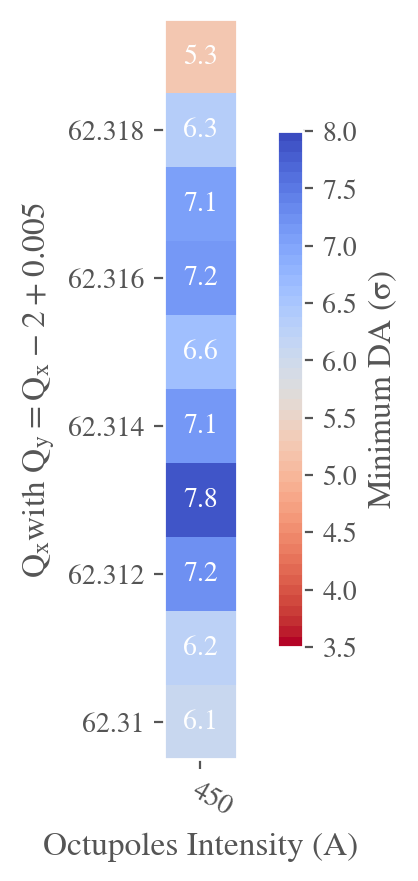

In [5]:
df_to_plot.columns = [str(oct) for oct in l_oct]

# replace nan in df by 10
df_to_plot = df_to_plot.fillna(10)


# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]

xlabel = "Octupoles Intensity (A)"
ylabel = r"$Q_x$" + "with " + r"$Q_y = Q_x -2 + 0.005$"
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME,
    link=None,
    plot_contours=False,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    betx = 1,
    bety = 1,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel=xlabel,
    ylabel=ylabel,
    plot_diagonal_lines=False,
    xaxis_ticks_on_top=False,
    display_intensity=False,
    title="",
)